In [1]:
import sys
sys.path.insert(0, '../')
import ccob_qe_analysis_BOT as ana
import ccob_utils as u
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import numpy as np
import glob
import os

In [2]:
outdir_fits = '/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits'
led = 'nm960'

raft_list = ['R01','R02','R11','R12','R20','R22','R30']
#raft_list = ['R22']
e2v_list = ['R11','R12','R22', 'R30']
sensor_list = ['S00','S01','S02','S10','S11','S12','S20','S21','S22']
ccdid_list = sorted([raft+'_'+sensor for sensor in sensor_list for raft in raft_list])
flist = {}
for i,ccdid in enumerate(ccdid_list):
    flist[ccdid] = glob.glob(os.path.join(outdir_fits,'QE_'+ccdid+'_'+led+'*'))

In [21]:
import yaml

ccob_diagnostic = {}
for key in list(flist.keys()):
    print(key)
    if key[0:3] in e2v_list:
        images = np.zeros((5, 4004, 4096))
    else:
        images = np.zeros((5, 4000, 4072))
    for i,f in enumerate(flist[key]):
        images[i], dum = u.make_ccd_2d_array(f)
        images[i] = images[i]/np.mean(images[i])
    mean = np.mean(images, axis=0)
    var = np.var(images, axis=0)
    ccob_diagnostic[key]={}
    ccob_diagnostic[key]['avg_of_mean'] = float(np.mean(mean)) # mean of the mean image obtained from averaging the 5 pointings
    ccob_diagnostic[key]['var_of_mean'] = float(np.var(mean))# std of the mean image obtained from averaging the 5 pointings
    ccob_diagnostic[key]['avg_of_var'] = float(np.mean(var)) # mean of the std image obtained from the 5 pointings
    ccob_diagnostic[key]['var_of_var'] = float(np.var(var)) # std of the std image obtained from the 5 pointings

with open('/home/combet/tmp_9rafts/QE_results/figs/'+led+'ccob_diagnostic.yaml', 'w') as outfile:
    yaml.dump(ccob_diagnostic, outfile)    
    

R01_S00
R01_S01
R01_S02
R01_S10
R01_S11
R01_S12
R01_S20
R01_S21
R01_S22
R02_S00
R02_S01
R02_S02
R02_S10
R02_S11
R02_S12
R02_S20
R02_S21
R02_S22
R11_S00
R11_S01
R11_S02
R11_S10
R11_S11
R11_S12
R11_S20
R11_S21
R11_S22
R12_S00
R12_S01
R12_S02
R12_S10
R12_S11
R12_S12
R12_S20
R12_S21
R12_S22
R20_S00
R20_S01
R20_S02
R20_S10
R20_S11
R20_S12
R20_S20
R20_S21
R20_S22
R22_S00
R22_S01
R22_S02
R22_S10
R22_S11
R22_S12
R22_S20
R22_S21
R22_S22
R30_S00
R30_S01
R30_S02
R30_S10
R30_S11
R30_S12
R30_S20
R30_S21
R30_S22


In [5]:
import yaml
f = '/home/combet/tmp_9rafts/QE_results/figs/'+led+'ccob_diagnostic.yaml'
ccob_diagnostic = yaml.load(open(f),Loader=yaml.FullLoader)
ccob_diagnostic

{'R01_S00': {'avg_of_mean': 0.9999999999999999,
  'avg_of_var': 0.0014071936306632412,
  'var_of_mean': 0.005986609389356509,
  'var_of_var': 1.3228820799042054e-05},
 'R01_S01': {'avg_of_mean': 1.000000000000002,
  'avg_of_var': 0.0007727936590045073,
  'var_of_mean': 0.0027732936778660576,
  'var_of_var': 1.7674784725343026e-07},
 'R01_S02': {'avg_of_mean': 0.9999999999999993,
  'avg_of_var': 0.0003559136936499802,
  'var_of_mean': 0.002311635141754937,
  'var_of_var': 1.933789564375661e-08},
 'R01_S10': {'avg_of_mean': 0.9999999999999993,
  'avg_of_var': 0.00012883688314092965,
  'var_of_mean': 0.00012931923628027475,
  'var_of_var': 1.0461068766975117e-08},
 'R01_S11': {'avg_of_mean': 1.0000000000000009,
  'avg_of_var': 1.2307645584200086e-05,
  'var_of_mean': 0.00012460441874282386,
  'var_of_var': 3.0537088314723262e-09},
 'R01_S12': {'avg_of_mean': 1.0000000000000009,
  'avg_of_var': 1.2064298677689364e-05,
  'var_of_mean': 0.00016448023180644673,
  'var_of_var': 1.3613578834767

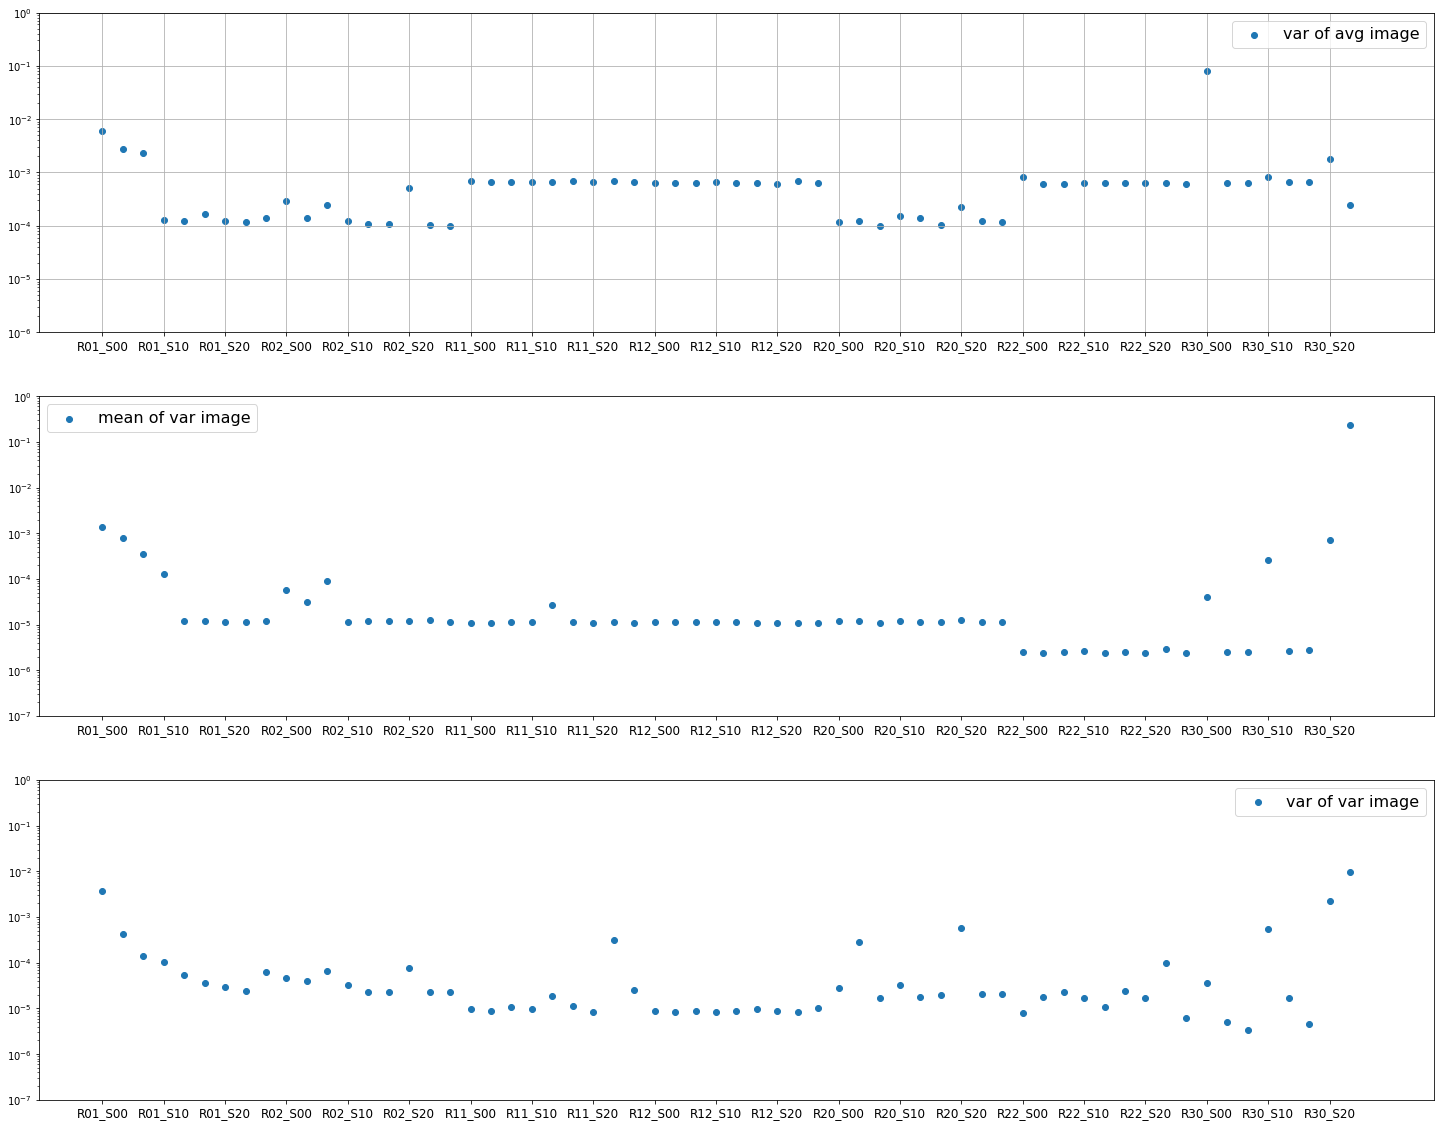

In [7]:
x_label = []
var_of_var = []
mean_of_mean = []
var_of_mean = []
mean_of_var = []

for key in list(flist.keys()):
    x_label = x_label + [key]
    var_of_var = var_of_var + [ccob_diagnostic[key]['var_of_var']]
    mean_of_mean = mean_of_mean + [ccob_diagnostic[key]['avg_of_mean']]
    var_of_mean = var_of_mean + [ccob_diagnostic[key]['var_of_mean']]
    mean_of_var = mean_of_var + [ccob_diagnostic[key]['avg_of_var']]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(25,20))
x_axis = np.arange(0, len(x_label))
axes[0].scatter(x_axis, var_of_mean,  label='var of avg image')
axes[1].scatter(x_axis, mean_of_var,  label='mean of var image')
axes[2].scatter(x_axis, np.sqrt(var_of_var),   label='var of var image')

axes[0].set_xticks(x_axis[0:len(x_axis):3])
axes[0].set_xticklabels(x_label[0:len(x_axis):3], fontsize=12)
axes[1].set_xticks(x_axis[0:len(x_axis):3])
axes[1].set_xticklabels(x_label[0:len(x_axis):3], fontsize=12)
axes[2].set_xticks(x_axis[0:len(x_axis):3])
axes[2].set_xticklabels(x_label[0:len(x_axis):3], fontsize=12)
axes[0].legend(fontsize=16)
axes[1].legend(fontsize=16)
axes[2].legend(fontsize=16)
axes[0].grid()
axes[1].grid()
axes[2].grid()
axes[0].set_yscale('log')
axes[1].set_yscale('log')
axes[2].set_yscale('log')
axes[0].set_ylim([1.e-6,1])
axes[1].set_ylim([1.e-7,1])
axes[2].set_ylim([1.e-7,1])

axes[1].grid()
axes[2].grid()

fig.savefig('/home/combet/tmp_9rafts/QE_results/figs/ccob_diagnostic'+'_'+led+'.pdf')


In [18]:
flist

{'R01_S00': ['/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R01_S00_nm960_-305.985_-180.145.fits',
  '/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R01_S00_nm960_-285.985_-180.145.fits',
  '/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R01_S00_nm960_-285.985_-159.785.fits',
  '/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R01_S00_nm960_-295.985_-169.965.fits',
  '/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R01_S00_nm960_-305.985_-159.785.fits'],
 'R01_S01': ['/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R01_S01_nm960_-306.115_-137.865.fits',
  '/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R01_S01_nm960_-306.115_-117.505.fits',
  '/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R01_S01_nm960_-296.115_-127.685.fits',
  '/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R01_S01_nm960_-286.115_-117.505.fits',
  '/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/fits/QE_R01_S01_nm960_-286.115_-137.865.fits'],
 'R01_S02': ['/gpfs/slac/lsst/fs1/u/combet/DATA/CCOB_QE/

In [33]:
raft_list = ['R01','R02','R11','R12','R20','R22','R30']
e2v_list = ['R11','R12','R22', 'R30']
sensor_list = ['S00','S01','S02','S10','S11','S12','S20','S21','S22']
ccdid_list = sorted([raft+'_'+sensor for sensor in sensor_list for raft in raft_list])
flist = {}

for i,ccdid in enumerate(ccdid_list):
    flist[ccdid] = glob.glob(os.path.join(outdir_fits,'QE_'+ccdid+'_'+led+'*'))
ccob_diagnostic = {}
for key in list(flist.keys()):
    print(key)
    if key[0:3] in e2v_list:
        images = np.zeros((5, 4004, 4096))
    else:
        images = np.zeros((5, 4000, 4072))
    std = 0
    for i,f in enumerate(flist[key]):
        if i==0:
            images[i], dum = u.make_ccd_2d_array(f)
        else:
            tmp, dum = u.make_ccd_2d_array(f)
            images[i] = images[0]-tmp
            std+=np.std(images[i])
    ccob_diagnostic[key] = std/(i+1)

R01_S00
R01_S01
R01_S02
R01_S10
R01_S11
R01_S12
R01_S20
R01_S21
R01_S22
R02_S00
R02_S01
R02_S02
R02_S10
R02_S11
R02_S12
R02_S20
R02_S21
R02_S22
R11_S00
R11_S01
R11_S02
R11_S10
R11_S11
R11_S12
R11_S20
R11_S21
R11_S22
R12_S00
R12_S01
R12_S02
R12_S10
R12_S11
R12_S12
R12_S20
R12_S21
R12_S22
R20_S00
R20_S01
R20_S02
R20_S10
R20_S11
R20_S12
R20_S20
R20_S21
R20_S22
R22_S00
R22_S01
R22_S02
R22_S10
R22_S11
R22_S12
R22_S20
R22_S21
R22_S22
R30_S00
R30_S01
R30_S02
R30_S10
R30_S11
R30_S12
R30_S20
R30_S21
R30_S22


In [54]:
ccob_diagnostic

{'R01_S00': 4917.725234944488,
 'R01_S01': 3670.6124064606493,
 'R01_S02': 1249.4616008827713,
 'R01_S10': 651.1652272194481,
 'R01_S11': 302.976812733765,
 'R01_S12': 302.1328456686215,
 'R01_S20': 297.6916878857269,
 'R01_S21': 294.58576717261724,
 'R01_S22': 316.37856573466564,
 'R02_S00': 568.4314019866379,
 'R02_S01': 539.0229873938692,
 'R02_S02': 689.3917996917282,
 'R02_S10': 309.7045002076905,
 'R02_S11': 300.8011400409381,
 'R02_S12': 308.31939588964525,
 'R02_S20': 320.1307918863143,
 'R02_S21': 320.5887994666606,
 'R02_S22': 300.40775238991534,
 'R11_S00': 272.68328662323825,
 'R11_S01': 273.42502373444756,
 'R11_S02': 273.9004994202959,
 'R11_S10': 271.6259611424514,
 'R11_S11': 422.93715592727114,
 'R11_S12': 271.971856235026,
 'R11_S20': 270.47143274341306,
 'R11_S21': 280.3284305763064,
 'R11_S22': 269.5465064357101,
 'R12_S00': 267.5437394882424,
 'R12_S01': 275.35721585239025,
 'R12_S02': 274.80211463065814,
 'R12_S10': 274.71576947186355,
 'R12_S11': 273.812762236437

In [55]:
std = []
x_label = []
for key in list(flist.keys()):
    x_label = x_label + [key]
    std = std + [ccob_diagnostic[key]]

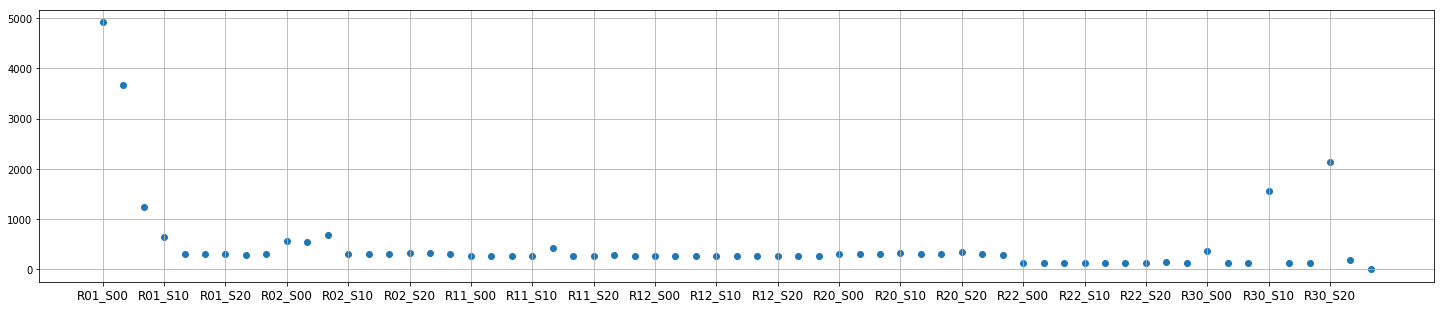

In [57]:
x_axis = np.arange(0, len(x_label))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(25,5))
ax.scatter(x_axis, std)
ax.set_xticks(x_axis[0:len(x_axis):3])
ax.set_xticklabels(x_label[0:len(x_axis):3], fontsize=12)
ax.grid()
fig.savefig('/home/combet/tmp_9rafts/QE_results/figs/ccob_diagnostic_from_diff'+'_'+led+'.pdf')